# planck fitの結果を確認する用

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [12]:
from modules.file_format.HDF5 import HDF5Reader


# データパス

In [13]:
dist_path_separate = '/Volumes/T7 Touch/T_calculation/planck_fit_dist/OIbDia08/OIbDia08_ 04_separate_half_p45e-2_dist.hdf'
dist_path_whole = '/Volumes/T7 Touch/T_calculation/planck_fit_dist/OIbDia08/OIbDia08_ 04_whole_p45e-2_dist.hdf'

In [14]:
separate = HDF5Reader(dist_path_separate)
whole = HDF5Reader(dist_path_whole)

HDF5ファイルが見つかりました: /Volumes/T7 Touch/T_calculation/planck_fit_dist/OIbDia08/OIbDia08_ 04_separate_half_p45e-2_dist.hdf
HDF5ファイルが見つかりました: /Volumes/T7 Touch/T_calculation/planck_fit_dist/OIbDia08/OIbDia08_ 04_whole_p45e-2_dist.hdf


In [15]:
separate_dist = separate.find_by('value/T')
whole_dist = whole.find_by('value/T')

max_instensity = whole.find_by('intensity')

「value/T」で検索します。
	-> entry/value/T を返しました。
「value/T」で検索します。
	-> entry/value/T を返しました。
「intensity」で検索します。
	-> entry/spe/2d_max_intensity を返しました。


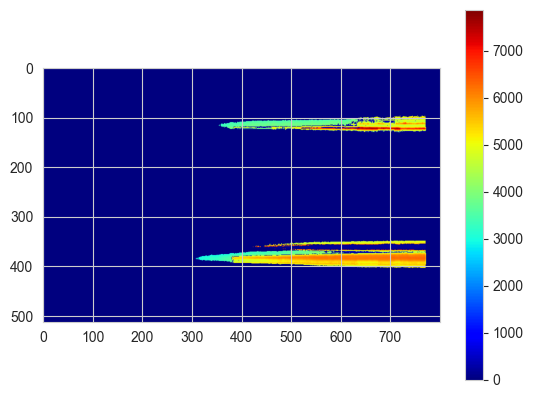

In [16]:
plt.imshow(whole_dist.T, cmap='jet')
plt.colorbar()
plt.show()
plt.close()

In [35]:
whole_dist.shape, max_instensity.shape

whole_adopted_dist = whole_dist.copy()
whole_adopted_dist[max_instensity < 5_000] = np.nan

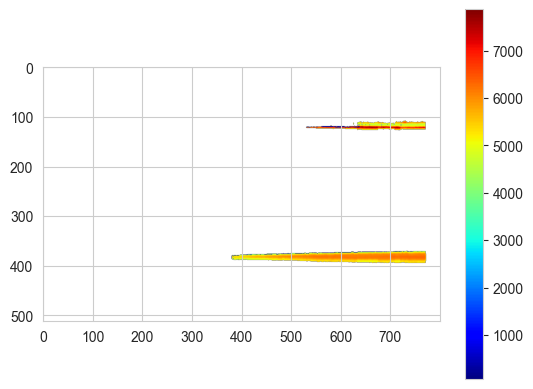

In [36]:

plt.imshow(whole_adopted_dist.T, cmap='jet')
plt.colorbar()
plt.show()
plt.close()

np.float64(23221.02734375)

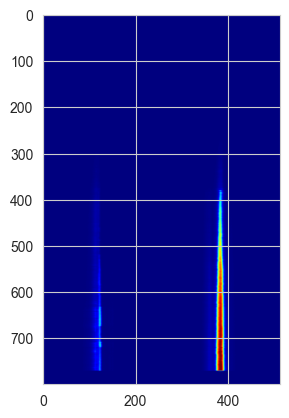

In [17]:
plt.imshow(max_instensity, cmap='jet')

(350.0, 400.0)

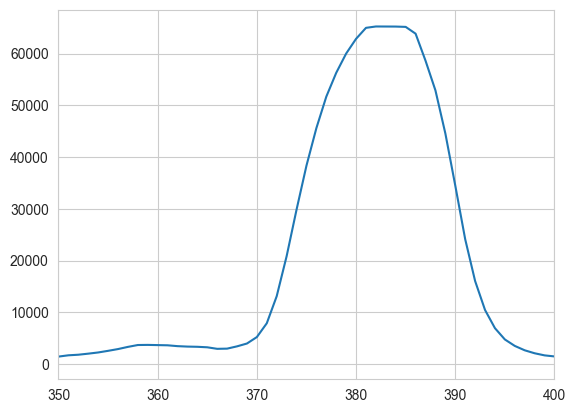

In [21]:
plt.plot(max_instensity.max(axis=0))
plt.xlim(350, 400)

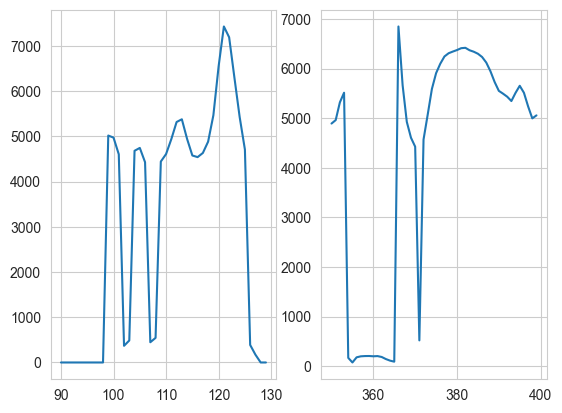

In [22]:
fig, axes = plt.subplots(1, 2)

from1 = 90
to1 = 130
axes[0].plot(np.arange(from1, to1), whole_dist[700, from1:to1])
from2 = 350
to2 = 400
axes[1].plot(np.arange(from2, to2), separate_dist[700, from2:to2])

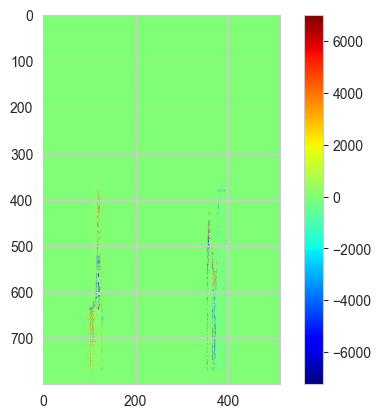

In [25]:
diff_T = whole_dist-separate_dist

plt.imshow(diff_T, cmap='jet')
plt.colorbar()

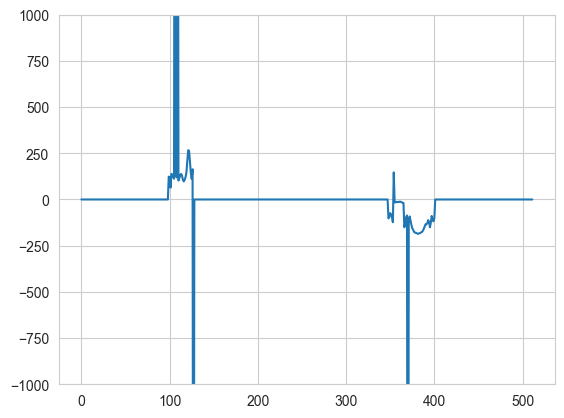

In [27]:
plt.plot(diff_T[700])
plt.ylim(-1_000, 1_000)
plt.grid(True)